# **Imports iniciais e adquirindo o dataset**

Nessa primeira parte, passamos pelos principais imports e selecionamos o dataset 'tips', vindo diretamente da biblioteca *Seaborn*.

*   **Pandas**: Usada para manipulação e análise de dados. Fornece estruturas de dados intuitivas e de alto desempenho, como o DataFrame, que permite carregar, explorar, limpar e processar dados tabulares de forma eficiente.

- **Numpy**: É a biblioteca fundamental para computação científica em Python. Oferece suporte para arrays multidimensionais e uma vasta coleção de funções matemáticas para operar com esses arrays.

- **Seaborn**: Uma biblioteca de visualização de dados baseada no Matplotlib. Ela fornece uma interface de alto nível para criar gráficos estatísticos.

- **SkLearn** (Scikit-Learn): A principal biblioteca para Machine Learning em Python. Oferece ferramentas simples e eficientes para análise preditiva, incluindo algoritmos para classificação, regressão, clustering, pré-processamento de dados, validação de modelos e muito mais.

In [ ]:
# Importações essenciais
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split

# Configurações
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
%matplotlib inline

# Carregar dados
df = sns.load_dataset('tips')
print("✅ Dataset carregado! Gorjetas de restaurante")
print(f"📊 Dimensões: {df.shape}")

✅ Dataset carregado! Gorjetas de restaurante
📊 Dimensões: (244, 7)


# Scatter plot inicial

🎯 NOSSO OBJETIVO: Prever o valor da GORJETA baseado no valor da CONTA

  Para isso, começamos do básico: **Entendendo nossos dados**, uma parte fundamental do processo. Uma boa base forma um bom modelo no futuro.

  O Objetivo central desse modelo, a priori, é o de, baseado na feature "total_bill" (valor total da conta), entender sua relação com a feture "tip" (o valor da gorjeta), e assim desenvolver um método de Regressão Linear para prever valores de gorjeta de modo eficaz.

🔍 VISÃO GERAL DOS DADOS:
   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

📈 ESTATÍSTICAS:
       total_bill         tip
count  244.000000  244.000000
mean    19.785943    2.998279
std      8.902412    1.383638
min      3.070000    1.000000
25%     13.347500    2.000000
50%     17.795000    2.900000
75%     24.127500    3.562500
max     50.810000   10.000000


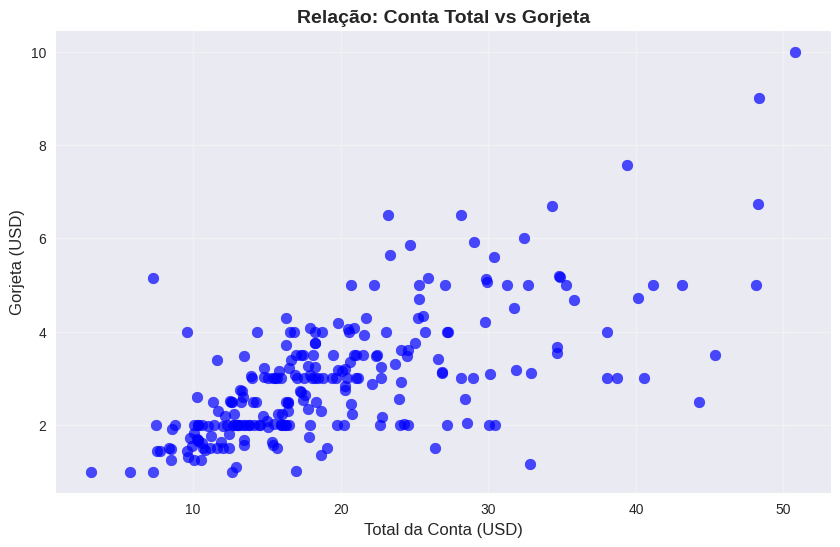

In [ ]:
print("🔍 VISÃO GERAL DOS DADOS:")
print("=" * 40)
print(df.head())
print(f"\n📈 ESTATÍSTICAS:")
print(df[['total_bill', 'tip']].describe())

# Gráfico principal - RELAÇÃO LINEAR CLARA
plt.figure(figsize=(10, 6))
plt.scatter(df['total_bill'], df['tip'], alpha=0.7, s=60, color='blue')
plt.xlabel('Total da Conta (USD)', fontsize=12)
plt.ylabel('Gorjeta (USD)', fontsize=12)
plt.title('Relação: Conta Total vs Gorjeta', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.show()



# Separação dos dados

Nessa segunda etapa, seguimos com a **Divisão dos dados**. Para esse modelo, optamos por treino e teste, o formato mais básico, com 80% dos dados visando o treino e os 20% restantes, o teste.
- Normalmente, há também a possibilidade de deixar 15% dos dados para *Validação*.

In [1]:
# Variáveis
X = df[['total_bill']]  # Variável independente
y = df['tip']           # Variável dependente

# Dividir dados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("📊 PREPARAÇÃO DOS DADOS:")
print("=" * 35)
print(f"Variável independente: total_bill")
print(f"Variável dependente: tip")
print(f"Treino: {X_train.shape[0]} amostras")
print(f"Teste: {X_test.shape[0]} amostras")

NameError: name 'df' is not defined

# Modelo

A terceira etapa de criação e treinamento do modelo, baseado nos dados "_train" anteriores. O modelo é inicializado como uma **Regressão Linear**, e então treinado com o método ".fit".

As predições alvo então são feitas usando do método ".predict" com os dados de teste.

In [ ]:
# Criar e treinar modelo
model = LinearRegression()
model.fit(X_train, y_train)

# Fazer previsões
y_pred = model.predict(X_test)

print("🤖 MODELO TREINADO!")
print("=" * 25)
print(f"Coeficiente (inclinação): {model.coef_[0]:.3f}")
print(f"Intercepto: {model.intercept_:.3f}")
print(f"\n🧮 EQUAÇÃO: Gorjeta = {model.intercept_:.2f} + {model.coef_[0]:.2f} × Conta")

🤖 MODELO TREINADO!
Coeficiente (inclinação): 0.107
Intercepto: 0.925

🧮 EQUAÇÃO: Gorjeta = 0.93 + 0.11 × Conta


# Análise do modelo

Agora, precisamos avaliar nosso modelo, baseando-nos principalemnte nas métricas **R2** e **RMSE**: Nosso foco principal é o de *minimizá-las*, sem causar o chamado **Overfitting.**

In [ ]:
# Métricas
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("📈 AVALIAÇÃO DO MODELO:")
print("=" * 30)
print(f"R² (explica a variância): {r2:.3f}")
print(f"RMSE (erro médio): {rmse:.3f} USD")

print(f"\n💡 INTERPRETAÇÃO:")
print(f"- O modelo explica {r2*100:.1f}% da variação nas gorjetas")
print(f"- Erro médio de ±${rmse:.2f} nas previsões")

📈 AVALIAÇÃO DO MODELO:
R² (explica a variância): 0.545
RMSE (erro médio): 0.754 USD

💡 INTERPRETAÇÃO:
- O modelo explica 54.5% da variação nas gorjetas
- Erro médio de ±$0.75 nas previsões


# Resultado da regressão **Total da conta - Gorjeta**



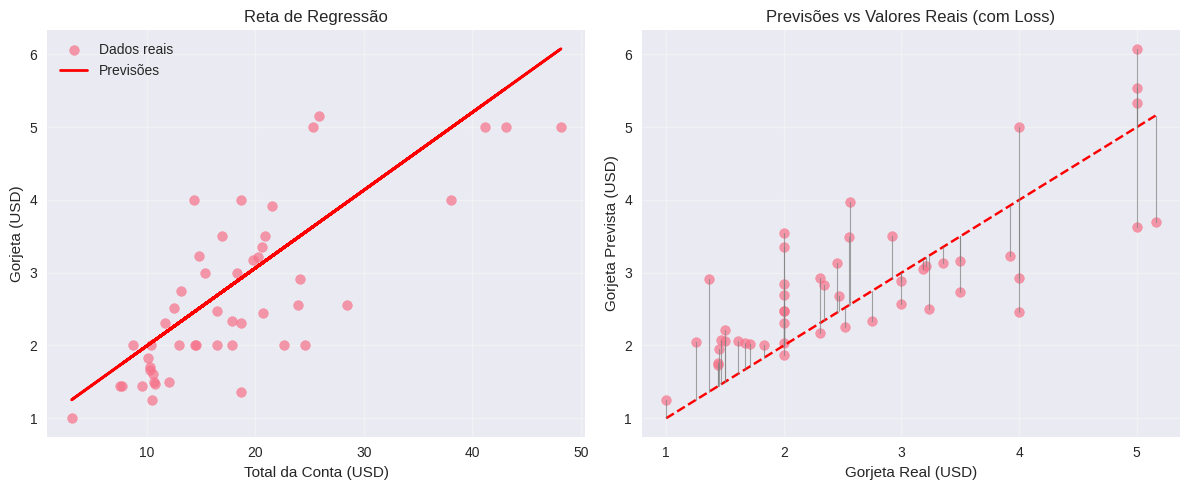

In [ ]:
plt.figure(figsize=(12, 5))

# Subplot 1: Reta de regressão
plt.subplot(1, 2, 1)
plt.scatter(X_test, y_test, alpha=0.7, s=50, label='Dados reais')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Previsões')
plt.xlabel('Total da Conta (USD)')
plt.ylabel('Gorjeta (USD)')
plt.title('Reta de Regressão')
plt.legend()
plt.grid(True, alpha=0.3)

# Subplot 2: Previsões vs Reais com linhas de loss
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred, alpha=0.7, s=50)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'red', linestyle='--')
# Adiciona as linhas verticais representando o loss
for i in range(len(y_test)):
    plt.plot([y_test.iloc[i], y_test.iloc[i]], [y_test.iloc[i], y_pred[i]], color='gray', linestyle='-', linewidth=0.8, alpha=0.7) # Modified linewidth and alpha

plt.xlabel('Gorjeta Real (USD)')
plt.ylabel('Gorjeta Prevista (USD)')
plt.title('Previsões vs Valores Reais (com Loss)')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Colocando "mais variáveis" na reta

A partir do noss resultado, surge a pergunta: *E se usássemos mais variáveis para moldar a reta?*
  A resposta: Podemos fazer isso! Mas será que, mesmo com features adicionais, o modelo é *necessariamente* mais eficaz? Vamos descobrir!

In [ ]:
y = df['tip']  # gorjeta
X = df.drop('tip', axis=1)  # todas as outras colunas

X = pd.get_dummies(X, drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

rmse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("R²:", r2)

RMSE: 0.7033566017436105
R²: 0.43730181943482505


Para isso, precisamos usar variáveis **Dummy**. Dummy Variables são um método similar ao do *One-hot Encoding*, assim, conseguimos "traduzir" as features. Dessa forma, ao invés de alimentar-mos o modelo com a informação do sexo do cliente, se é masculino ou feminino, podemos **transformar** a variável para usar **números** ao invés de palavras em si. Dessa forma, transforma-mos a variável para "sex_Female", onde recebe 1 para feminino e 0 para masculino.

Agora temos mais variáveis para trabalhar!





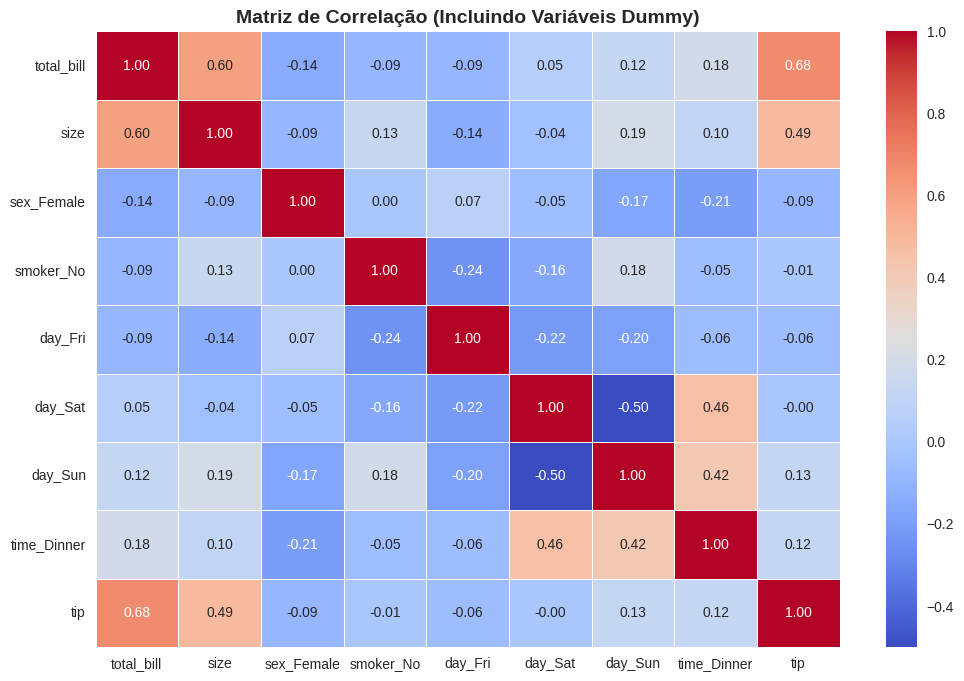

In [ ]:
# Concatenar as variáveis dummy com a variável dependente 'tip'
df_dummies = pd.concat([X, y], axis=1)

# Calcular a matriz de correlação
correlation_matrix_dummies = df_dummies.corr()

# Visualizar a matriz de correlação com um heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_dummies, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlação (Incluindo Variáveis Dummy)', fontsize=14, fontweight='bold')
plt.show()

E eis o nosso resultado! Ele é de fato menor, minimizamos os erros de forma que SIM, o modelo é melhor! Mas é melhor *o suficiente*?
- Isso fica a cargo do projetista e do problema em si. Acabamos lidando com um *trade-off*: Aumentamos a eficácia do modelo, mas os **recursos computacionais** usados para tal, fazem valer a pena?
- Nesse caso, lidamos com um problema e modelos relativamente simples, mas a nível industrial e empresarial, especialmente quando lidamos com informações confidenciais e sigilosas (como por influencia da LGPD), onde podemos não ter acesso ao panorama total dos dados, podemos (*e devemos!*) fazer muito com os dados disponíveis à mesa.

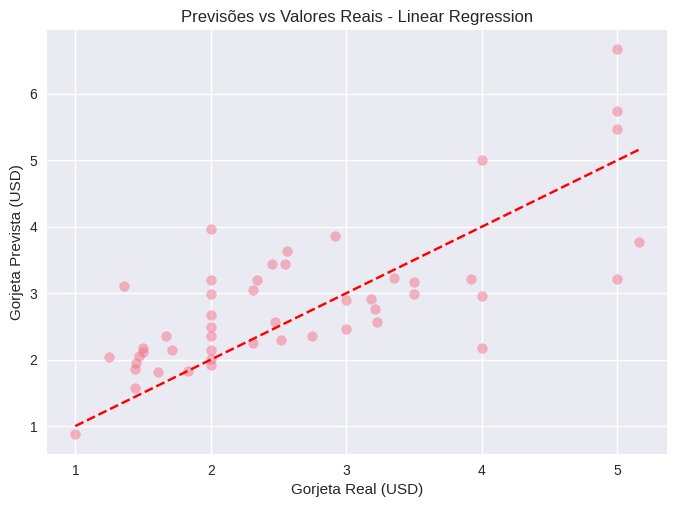

In [ ]:
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Gorjeta Real (USD)")
plt.ylabel("Gorjeta Prevista (USD)")
plt.title("Previsões vs Valores Reais - Linear Regression")
plt.show()